<a href="https://colab.research.google.com/github/Bendrox/Open-Source_models_with_HuggingFace/blob/main/HuggingFace_Open_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This notebook presents a series of examples using Hugging Face  models to accomplish various tasks in the fields of NLP, computer vision, and audio. The goal is to demonstrate the versatile capabilities of pretrained models and show how they can be applied.


# 1 - Text generation & Text2text

## 1.1 - Text-generation

In [3]:
pip show transformers

Name: transformers
Version: 4.44.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


In [4]:
from transformers import pipeline

In [24]:
generator_1 = pipeline(task = "text-generation", model="facebook/blenderbot-400M-distill",
                       device=0)

In [6]:
generator_1("What are some fun activities I can do in the summer?",
            do_sample=False)

[{'generated_text': "What are some fun activities I can do in the winter? Yeah, that's how it goes."}]

## 1.2 - Text2text-generation task

In [23]:
generator_2 = pipeline(task = "text2text-generation",
                       model="facebook/blenderbot-400M-distill",
                       device=0) # Indique au pipeline d'utiliser le premier GPU disponible

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/730M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/62.9k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/16.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/310k [00:00<?, ?B/s]

In [8]:
generator_2("What are some fun activities I can do in the summer?", do_sample=False)

[{'generated_text': " I'm not sure, but I'm sure you can find something fun to do.  What do you like to do?"}]

# 2 - Translation & Summarization

## 2.1 - Translation

Here we choose to use : nllb-200-distilled-600M a model capable of translating more than 200 languages.
We opted for bfloat16 quantization, which offers an excellent balance between performance and speed.

In [9]:
import torch

In [10]:
translator = pipeline(task = "translation",
                      model="facebook/nllb-200-distilled-600M",
                      torch_dtype=torch.bfloat16) # quantization in bfloat a good to compress the model

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [11]:
fr_text_translated = translator("What are some fun activities I can do in the winter?",
                             src_lang="eng_Latn",
                             tgt_lang="fra_Latn")

In [12]:
print(fr_text_translated)

[{'translation_text': 'Quelles sont quelques activités amusantes que je peux faire en hiver ?'}]


In [13]:
ru_text_translated = translator("What are some fun activities I can do in the winter?",
                             src_lang="eng_Latn",
                             tgt_lang="rus_Cyrl")

In [14]:
print(ru_text_translated)

[{'translation_text': 'Какие забавные занятия я могу заниматься зимой?'}]


In [15]:
# to have enough free memory to run the rest of the code, please run the following to free up memory on the machine
import gc
gc.collect()

263

## 2.2 - Summarization

In [16]:
from transformers import pipeline

For this task we will use Bart-large-cnn

In [17]:
summarizer = pipeline(task="summarization",
                      model="facebook/bart-large-cnn",
                      torch_dtype=torch.bfloat16)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [18]:
text = """Paris is the capital and most populous city of France, with
          an estimated population of 2,175,601 residents as of 2018,
          in an area of more than 105 square kilometres (41 square
          miles). The City of Paris is the centre and seat of
          government of the region and province of Île-de-France, or
          Paris Region, which has an estimated population of
          12,174,880, or about 18 percent of the population of France
          as of 2017."""

In [19]:
sum = summarizer(text,
                 min_length=10, # paramerters of the summary
                     max_length=50) # paramerters of the summary
print(sum)

[{'summary_text': 'Paris is the capital and most populous city of France, with an estimated population of 2,175,601 residents as of 2018. The City of Paris is the centre and seat of government of the region and province of Île-'}]


Ouput summary  :  Paris is the capital and most populous city of France, with an estimated population of 2,175,601 residents as of 2018. The City of Paris is the centre and seat of government of the region and province of Île

# 3 - Sentence Embedding / Similarity

Determining the similarity between two sentences by measuring how closely they resemble each other :


In [3]:
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
model_similarity = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
sentences1 = ['The cat sits outside',
              'A man is playing guitar',
              'The movies are awesome']

In [6]:
embedding_1 = model_similarity.encode(sentences1,
                                      convert_to_tensor=True)
print(embedding_1)

tensor([[ 0.1392,  0.0030,  0.0470,  ...,  0.0641, -0.0163,  0.0636],
        [ 0.0227, -0.0014, -0.0056,  ..., -0.0225,  0.0846, -0.0283],
        [-0.1043, -0.0628,  0.0093,  ...,  0.0020,  0.0653, -0.0150]],
       device='cuda:0')


Here each row of the embedding_1 matrix represents a vector of embeddings for a specific sentence.

The columns (here, 384 dimensions) correspond to the numerical values ​​which represent the semantic characteristics of each sentence.

In [7]:
sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

In [8]:
embedding_2 = model_similarity.encode(sentences2,
                                      convert_to_tensor=True)
print(embedding_2)

tensor([[ 0.0163, -0.0700,  0.0384,  ...,  0.0447,  0.0254, -0.0023],
        [ 0.0054, -0.0920,  0.0140,  ...,  0.0167, -0.0086, -0.0424],
        [-0.0842, -0.0592, -0.0010,  ..., -0.0157,  0.0764,  0.0389]],
       device='cuda:0')


Calculate the cosine similarity between two sentences as a measure of how similar they are to each other :

In [9]:
from sentence_transformers import util

In [10]:
cosine_scores = util.cos_sim(embedding_1, embedding_2)
print(cosine_scores)

tensor([[ 0.2838,  0.1310, -0.0029],
        [ 0.2277, -0.0327, -0.0136],
        [-0.0124, -0.0465,  0.6571]], device='cuda:0')


Cosine similarity typically varies from -1 to 1:

- Values near to 1: The vectors are identical, meaning that the sentences are very similar or identical in terms of semantics.

- Values near to 0: The vectors are orthogonal, indicating that there is no similarity between the sentences (no semantic relationship).
- Values near to -1: The vectors are opposite, which would indicate negative similarity (which is rare in cases of semantic sentence embeddings).

In [12]:
for sent1, sent2, score in zip(sentences1, sentences2, cosine_scores.diagonal()):
    print(f"{sent1} \t\t {sent2} \t\t Score: {score:.4f}")

The cat sits outside 		 The dog plays in the garden 		 Score: 0.2838
A man is playing guitar 		 A woman watches TV 		 Score: -0.0327
The movies are awesome 		 The new movie is so great 		 Score: 0.6571


# 4 - Audio classification (Zero short)

The task is to classify an audio (barking of a dog) :

In [ ]:
!pip install datasets
!pip install soundfile
!pip install librosa

In [12]:
from datasets import load_dataset, load_from_disk
from transformers import pipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [5]:
dataset = load_dataset("ashraq/esc50", # This dataset is a collection of different sounds of 5 seconds
                       split="train[0:10]")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/345 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


dataset_infos.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

(…)-00000-of-00002-2f1ab7b824ec751f.parquet:   0%|          | 0.00/387M [00:00<?, ?B/s]

(…)-00001-of-00002-27425e5c1846b494.parquet:   0%|          | 0.00/387M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [6]:
audio_sample_1 = dataset[0]

In [7]:
audio_sample_1

{'filename': '1-100032-A-0.wav',
 'fold': 1,
 'target': 0,
 'category': 'dog',
 'esc10': True,
 'src_file': 100032,
 'take': 'A',
 'audio': {'path': None,
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 44100}}

In [8]:
from IPython.display import Audio as AudioDisp


In [9]:
AudioDisp(audio_sample_1["audio"]["array"], #signal audio stocké sous forme de tableau NumPy ou de liste Python
             rate=audio_sample_1["audio"]["sampling_rate"]) #taux d'échantillonnage : info  pour jouer l'audio à la vitesse originale

For this task we will use CLAP. This model take both text as candidate_labels and audio as input. The model computes the similarity between both. If text strongly correlated with the audio, you will have a high score.

 CLAP is based on Contrastive learning. This ML technique has shown remarkable success in the field of multimodal representation learning. The central idea is to get the model to learn which data are similar and which are not, by maximizing the similarity between similar pairs and minimizing the similarity between dissimilar pairs.

In [13]:
zero_shot_classifier = pipeline(
    task="zero-shot-audio-classification",
    model="laion/clap-htsat-unfused")

config.json:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/615M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


First, let's determine the sampling rate input expected by the model. This is a very important information since it have a huge influence on how the model will interpret the information.

As a reminder the sampling rate is the number of times per second that an analog audio signal is measured (sampled) to be converted to a digital signal. It is expressed in hertz (Hz) or kHz (kilohertz).

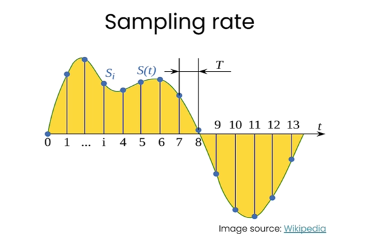

In [14]:
zero_shot_classifier.feature_extractor.sampling_rate

48000

It seems that the model was created using the 48 KHz audio. But what about our data?

In [15]:
audio_sample_1["audio"]["sampling_rate"]

44100

Seems ok since its not a big difference. Let's cast it  

In [16]:
from datasets import Audio
dataset = dataset.cast_column(
    "audio",
     Audio(sampling_rate=48_000))

In [17]:
audio_sample = dataset[0]
audio_sample

{'filename': '1-100032-A-0.wav',
 'fold': 1,
 'target': 0,
 'category': 'dog',
 'esc10': True,
 'src_file': 100032,
 'take': 'A',
 'audio': {'path': None,
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 48000}}

In [18]:
candidate_labels = ["dog",
                    " vacuum cleaner"]

In [19]:
zero_shot_classifier(audio_sample["audio"]["array"],
                     candidate_labels=candidate_labels)

[{'score': 0.9984489679336548, 'label': 'dog'},
 {'score': 0.0015510071534663439, 'label': ' vacuum cleaner'}]

If text strongly correlated with the audio, you will have a high score which is our case. Let's try some other lables :

In [20]:
candidate_labels = ["Sound of a child crying",
                    "Sound of vacuum cleaner",
                    "Sound of a bird singing",
                    "Sound of an airplane"]

In [21]:
zero_shot_classifier(audio_sample["audio"]["array"],
                     candidate_labels=candidate_labels)

[{'score': 0.6172530055046082, 'label': 'Sound of a bird singing'},
 {'score': 0.21602635085582733, 'label': 'Sound of vacuum cleaner'},
 {'score': 0.12547191977500916, 'label': 'Sound of an airplane'},
 {'score': 0.04124866798520088, 'label': 'Sound of a child crying'}]

# 5 - Speech to text (with Gradio app)

Audio recording to a text. Here we load audio dataset ( librispeech_asr corpus of 1k hours from narrative audiobooks) in streaming mode.

## 5 .1 - Automatic speech recognition (to text)

In [46]:
!pip install datasets
!pip install soundfile
!pip install librosa #  permet d'extraire pls caract des audio: tempo,  spectre de fréquences,  chroma (caractéristiques musicales), la tonalité...
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [47]:
from datasets import load_dataset
from transformers import pipeline

In [48]:
dataset = load_dataset("librispeech_asr",
                       split="train.clean.100",
                       streaming=True,
                       trust_remote_code=True)

librispeech_asr.py:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
example = next(iter(dataset))

In [ ]:
# here access to the 5 first audio
dataset_head = dataset.take(5)

In [ ]:
example

In [ ]:
from IPython.display import Audio as IPythonAudio

IPythonAudio(example["audio"]["array"],
             rate=example["audio"]["sampling_rate"])

In hugginFace Whisper (from Open AI) seems to be the best one. Cloud be applied to 96 languages.

In [ ]:
asr = pipeline(task="automatic-speech-recognition",
               model="distil-whisper/distil-small.en") # here just distil language that work with ENG

In [ ]:
asr.feature_extractor.sampling_rate

In [ ]:
asr.feature_extractor.sampling_rate

In [ ]:
example['audio']['sampling_rate']

OK they are the same

In [ ]:
asr(example["audio"]["array"])

In [ ]:
example["text"]

Ok seems that the output of the model is good enough.

## 5.2 - Implementing Recording - Text transcription (with Gradio app)


Gradio is an open-source Python library that allows to easily create simple and accessible interactive user interfaces (UIs) for ML models or GenAI app.



In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import os

Two options :

1 - The line demo = gr.Blocks() initializes a Gradio Blocks object. Gradio's Blocks is a flexible framework for creating complex, multi-step user interfaces. Blocks allows you to structure your UI with multiple components (like buttons, text inputs, images, etc.) and organize them into containers. More suitable for complex workflows /dashboards.

2- Use simpler gr.Interface, which is designed for quick, single-function interfaces. More suitable for simple workflows.

In [ ]:
demo = gr.Blocks() #initializes a Gradio Blocks object
# here defines the Gradio UI layout, and everything inside it (text inputs, buttons, etc.)

In [ ]:
#for transcribing audio files into text using ASR function

def transcribe_speech(filepath):
    if filepath is None:
        gr.Warning("No audio found, please retry.")
        return ""
    output = asr(filepath)
    return output["text"]

In [ ]:
#To upload files for transcription
mic_transcribe = gr.Interface( #creates a simple web interface for running functions interactively
    fn=transcribe_speech, #inject the function to be executed
    inputs=gr.Audio(sources="microphone", # add component to allows the user to record or upload audio. microphone as the audio source.
                    type="filepath"), # the audio will be recorded  here from the user's microphone.
    outputs=gr.Textbox(label="Transcription", # to show the transcription result
                       lines=3),
    allow_flagging="never") # used to mark or report problematic outputs.

In [ ]:
#To upload files for transcription
file_transcribe = gr.Interface(
    fn=transcribe_speech,
    inputs=gr.Audio(sources="upload",
                    type="filepath"),
    outputs=gr.Textbox(label="Transcription",
                       lines=3),
    allow_flagging="never")

In [ ]:
with demo: #create env for structuring the app + demo = gr.gradio() permet de regrouper et de structurer différents composants
    gr.TabbedInterface(
        [mic_transcribe,
         file_transcribe],
        ["Transcribe Microphone", # attributing names to functions
         "Transcribe Audio File"],# attributing names to functions
    )

In [ ]:
#starts the Gradio interface. It launches on local server
demo.launch(share=True)


Attention : le modele ne semble pas accepter les audios sterio deux canaux pour créer de la spacialité dans le son. Penser a convertir en mono avant d'uploader sur l'application ( cas de la plus part des modeles)

In [ ]:
# If our audio does not fit in the model

# Case 1: We have a sterio sound :
# Solultion :  convert a sound to mono
# audio.shape() # to see of mono or sterio sound
# import numpy as np
# import librosa
# audio_transposed = np.transpose(audio)
# audio_transposed.shape #nbr of chanel 1er + data
# IPythonAudio(audio_mono,rate=sampling_rate)
# asr(audio_mono)

# Case 2: We have more than 30 s recording
# Since the model accept only 30s recording we do chunks and add over lap to merge the transcriptions accordinly
# the pipeline handels the chunks in parallel
# asr( audio_16KHz,
   # chunk_length_s=30, # 30 seconds
   # batch_size=4, #larger need more memory
   # return_timestamps=True, # enable predicting segment level timestamps for the audio data that indicate start & end time
                            # + alignes the transcriptions with the input audio
                            # for subtitles + searching specific + cutting the audio
   # )["chunks"]

#def transcribe_long_form(filepath):
   # if filepath is None:
   #     gr.Warning("No audio found, please retry.")
   #     return ""
   # output = asr(
   #  filepath,
   #   max_new_tokens=256,   #here add arg
   #   chunk_length_s=30,    #here add arg
   #  batch_size=8,          #here add arg
   # )
   # return output["text"]

# Case 3: Frequency /quality dif
# asr.feature_extractor.sampling_rate check the model input format
# audio_16KHz = librosa.resample(audio_mono,orig_sr=sampling_rate,target_sr=16000) # reshape Hz

# 6 - Text to Speech

## 6.1 - facebook/mms-tts-fra model

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-to-speech", model="facebook/mms-tts-fra")

output_fr = pipe("Bonjour Timour, comment va tu ?")

In [ ]:
# Lire l'audio directement sans le sauvegarder
from IPython.display import Audio
Audio(output_fr["audio"], rate=16000, autoplay=True)

## 6.2 - Bark model

Bark is an highly-controllable text-to-speech model, meaning you can use with various settings, as we are going to see.

In [ ]:
from transformers import BarkModel

model = BarkModel.from_pretrained("suno/bark-small")

In [ ]:
#Place the model to an accelerator device if available.
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.to(device)

Load `BarkProcessor` in order to be able to pre-process the inputs.

The processor role here is two-sides:
1. It is used to tokenize the input text, i.e. to cut it into small pieces that the model can understand.
2. It stores speaker embeddings, i.e voice presets that can condition the generation.

In [ ]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("suno/bark")

In [ ]:
# prepare the inputs
voice_preset = "v2/fr_speaker_1"

text_prompt = "Salut Timour , es tu fatigué [laughter]"
inputs = processor(text_prompt, voice_preset=voice_preset)

# generate speech
speech_output = model.generate(**inputs.to(device))

In [ ]:
from IPython.display import Audio

sampling_rate = model.generation_config.sample_rate
Audio(speech_output[0].cpu().numpy(), rate=sampling_rate)

## 6.3 - Speecht5_tts model


In [ ]:
from transformers import pipeline
from datasets import load_dataset
import soundfile as sf

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts")

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")



In [ ]:
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0) #


In [ ]:
# You can replace this embedding with your own as well.

speech = synthesiser("Hello , what are your planes for today  ?", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])

In [ ]:
from IPython.display import Audio

# Lire le fichier audio généré
Audio("speech.wav", autoplay=True)


# 7 - Image Object detection

In [ ]:
!pip install transformers gradio torch torchvision

In [ ]:
import torch
from transformers import DetrForObjectDetection, DetrImageProcessor
import gradio as gr
from PIL import Image, ImageDraw, ImageFont

In [ ]:
# Charger le modèle et le processeur
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')
processor = DetrImageProcessor.from_pretrained('facebook/detr-resnet-50')

In [ ]:

# Importer les bibliothèques
from transformers import pipeline
import gradio as gr
import torch
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_tensor, to_pil_image

# Créer le pipeline de détection d'objets
object_detector = pipeline('object-detection', model='facebook/detr-resnet-50')

# Définir la fonction de détection d'objets
def detect_objects(image):
    # Obtenir les prédictions
    results = object_detector(image)

    # Convertir l'image en tenseur
    image_tensor = to_tensor(image).mul(255).byte()

    # Préparer les boîtes et les étiquettes
    boxes = []
    labels = []
    for result in results:
        boxes.append([
            result['box']['xmin'],
            result['box']['ymin'],
            result['box']['xmax'],
            result['box']['ymax']
        ])
        labels.append(f"{result['label']} {result['score']:.2f}")

    if boxes:
        boxes = torch.tensor(boxes, dtype=torch.int)
        # Dessiner les boîtes sur l'image
        image_with_boxes = draw_bounding_boxes(
            image_tensor, boxes, labels=labels, colors="red", width=2, font_size=20
        )
        # Convertir en image PIL
        image_with_boxes = to_pil_image(image_with_boxes)
    else:
        # Si aucune boîte n'est détectée, retourner l'image originale
        image_with_boxes = image

    return image_with_boxes

# Créer l'interface Gradio
demo = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="pil"),
    outputs=gr.Image(type="pil"),
    title="Object-detection with detr-resnet-50",
    description="Chargez une image et le modèle détectera les objets."
)

# Lancer l'application
demo.launch()


# 8 - Multimodels : Image Captioning (Bleep)


Here the task will consiste of generating a text (like a descripiton) from an image. Two type:
- Conditionnal : need to give the start of the sentense.
- Unconditionnal: no need to give any input.

Bellow we are choose to do the unconditionnal one.

In [ ]:
from transformers import BlipForConditionalGeneration

In [ ]:
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-base")

In [ ]:
from transformers import AutoProcessor

In [ ]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-image-captioning-base")

In [ ]:
#Option 1: directly upload
from PIL import Image
from google.colab import files
uploaded = files.upload()

In [ ]:
filename = next(iter(uploaded))
image = Image.open(filename)
image

In [ ]:
# Option 2:
#from PIL import Image
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#from PIL import Image
# Chemin vers votre fichier dans Google Drive
#image_path = '/content/drive/MyDrive/Images/11.jpeg'
# Charger l'image
#image = Image.open(image_path)
#image

In [ ]:
inputs = processor(image,return_tensors="pt")

In [ ]:
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# 9 - Visual Q&A Multimodel

Here the aim of the exercise is to ask a question about the picture and get the answer from the model based on the picture.
AutoProcessor vous permet de charger un processor adapté au modèle que vous utilisez sans avoir à connaître le nom exact du processor spécifique.

In [ ]:
from transformers import BlipForQuestionAnswering

In [ ]:
model = BlipForQuestionAnswering.from_pretrained(
    "Salesforce/blip-vqa-base")

In [ ]:
#load a processor suitable for the model you are using without having to know the exact name of the specific processor
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("Salesforce/blip-vqa-base")

In [ ]:
#upload the picture
from PIL import Image
from google.colab import files
uploaded = files.upload()

In [ ]:
# Extract the  name
filename = next(iter(uploaded))
image = Image.open(filename)
image

In [ ]:
question = " what is in the picture ?  "

In [ ]:
from PIL import Image
inputs = processor(image, question, return_tensors="pt")

In [ ]:
out = model.generate(**inputs)

In [ ]:
print(processor.decode(out[0], skip_special_tokens=True))